In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brijbhushannanda1979/bigmart-sales-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'bigmart-sales-data' dataset.
Path to dataset files: /kaggle/input/bigmart-sales-data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
df = pd.read_csv(
    '/root/.cache/kagglehub/datasets/brijbhushannanda1979/bigmart-sales-data/versions/1/Train.csv'
)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df["Outlet_Establishment_Year"] = pd.to_datetime(
    df["Outlet_Establishment_Year"],
    format="%Y"
)

In [ ]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
# =====================================================
# 🛒 BIGMART – BUSINESS RATIO REPORT
# =====================================================

print("=====================================")
print("📊 BIGMART BUSINESS RATIO REPORT")
print("=====================================\n")

# -------------------------------
# 1) Dataset Overview
# -------------------------------
print("===== DATA OVERVIEW =====\n")
print(f"Total Records : {df.shape[0]:,}")
print(f"Total Features: {df.shape[1]:,}\n")

# -------------------------------
# 2) Financial Ratios
# -------------------------------
print("===== FINANCIAL RATIOS =====\n")

total_sales = df["Item_Outlet_Sales"].sum()
total_items = df["Item_Identifier"].nunique()
total_outlets = df["Outlet_Identifier"].nunique()

avg_sales_per_item = total_sales / total_items
sales_per_outlet = total_sales / total_outlets

print(f"Total Sales               : {total_sales:,.2f}")
print(f"Average Sales per Item    : {avg_sales_per_item:,.2f}")
print(f"Average Sales per Outlet  : {sales_per_outlet:,.2f}\n")

# Sales Contribution by Item Type
contribution_item = (
    df.groupby("Item_Type")["Item_Outlet_Sales"]
      .sum()
      .sort_values(ascending=False)
)

print("Top 5 Sales Contribution by Item Type:")
print((contribution_item / total_sales * 100).head(5).round(2).astype(str) + "%\n")

# -------------------------------
# 3) Performance Ratios
# -------------------------------
print("===== PERFORMANCE RATIOS =====\n")

# Sales per Outlet Type
sales_outlet_type = (
    df.groupby("Outlet_Type")["Item_Outlet_Sales"]
      .mean()
      .sort_values(ascending=False)
)

print("Average Sales per Outlet Type:")
print(sales_outlet_type.round(2), "\n")

# Sales per Outlet Size
sales_outlet_size = (
    df.groupby("Outlet_Size")["Item_Outlet_Sales"]
      .mean()
      .sort_values(ascending=False)
)

print("Average Sales per Outlet Size:")
print(sales_outlet_size.round(2), "\n")

# -------------------------------
# 4) Marketing Ratios
# -------------------------------
print("===== MARKETING RATIOS =====\n")

# Sales per Visibility
df_vis = df[df["Item_Visibility"] > 0]
sales_per_visibility = (
    df_vis["Item_Outlet_Sales"].sum() /
    df_vis["Item_Visibility"].sum()
)

print(f"Sales per Visibility Unit : {sales_per_visibility:,.2f}")

# Visibility Efficiency (lower is better)
visibility_efficiency = (
    df_vis["Item_Visibility"].sum() /
    df_vis["Item_Outlet_Sales"].sum()
)

print(f"Visibility Efficiency     : {visibility_efficiency:.6f}\n")

# -------------------------------
# 5) Price & Demand Ratios
# -------------------------------
print("===== PRICE & DEMAND RATIOS =====\n")

sales_per_mrp = (
    df["Item_Outlet_Sales"].sum() /
    df["Item_MRP"].sum()
)

print(f"Sales per MRP Unit        : {sales_per_mrp:.2f}")

# High vs Low Price Ratio
median_price = df["Item_MRP"].median()

high_price_sales = df[df["Item_MRP"] >= median_price]["Item_Outlet_Sales"].sum()
low_price_sales  = df[df["Item_MRP"] <  median_price]["Item_Outlet_Sales"].sum()

price_ratio = high_price_sales / low_price_sales

print(f"High vs Low Price Sales Ratio : {price_ratio:.2f}\n")

# -------------------------------
# 6) Key Executive Insights
# -------------------------------
print("===== EXECUTIVE INSIGHTS =====\n")

top_item = contribution_item.index[0]
top_outlet_type = sales_outlet_type.index[0]
top_outlet_size = sales_outlet_size.index[0]

print(f"- Best-selling category        : {top_item}")
print(f"- Most efficient outlet type   : {top_outlet_type}")
print(f"- Best performing outlet size  : {top_outlet_size}")
print("- Visibility strongly impacts sales → shelf optimization is critical")
print("- Price sensitivity exists → premium items still perform well\n")

📊 BIGMART BUSINESS RATIO REPORT

===== DATA OVERVIEW =====

Total Records : 8,523
Total Features: 12

===== FINANCIAL RATIOS =====

Total Sales               : 18,591,125.41
Average Sales per Item    : 11,925.03
Average Sales per Outlet  : 1,859,112.54

Top 5 Sales Contribution by Item Type:
Item_Type
Fruits and Vegetables    15.17%\n
Snack Foods               14.7%\n
Household                11.06%\n
Frozen Foods              9.82%\n
Dairy                     8.19%\n
Name: Item_Outlet_Sales, dtype: object
===== PERFORMANCE RATIOS =====

Average Sales per Outlet Type:
Outlet_Type
Supermarket Type3    3694.04
Supermarket Type1    2316.18
Supermarket Type2    1995.50
Grocery Store         339.83
Name: Item_Outlet_Sales, dtype: float64 

Average Sales per Outlet Size:
Outlet_Size
Medium    2681.60
High      2299.00
Small     1912.15
Name: Item_Outlet_Sales, dtype: float64 

===== MARKETING RATIOS =====

Sales per Visibility Unit : 30,909.74
Visibility Efficiency     : 0.000032

===== PRIC

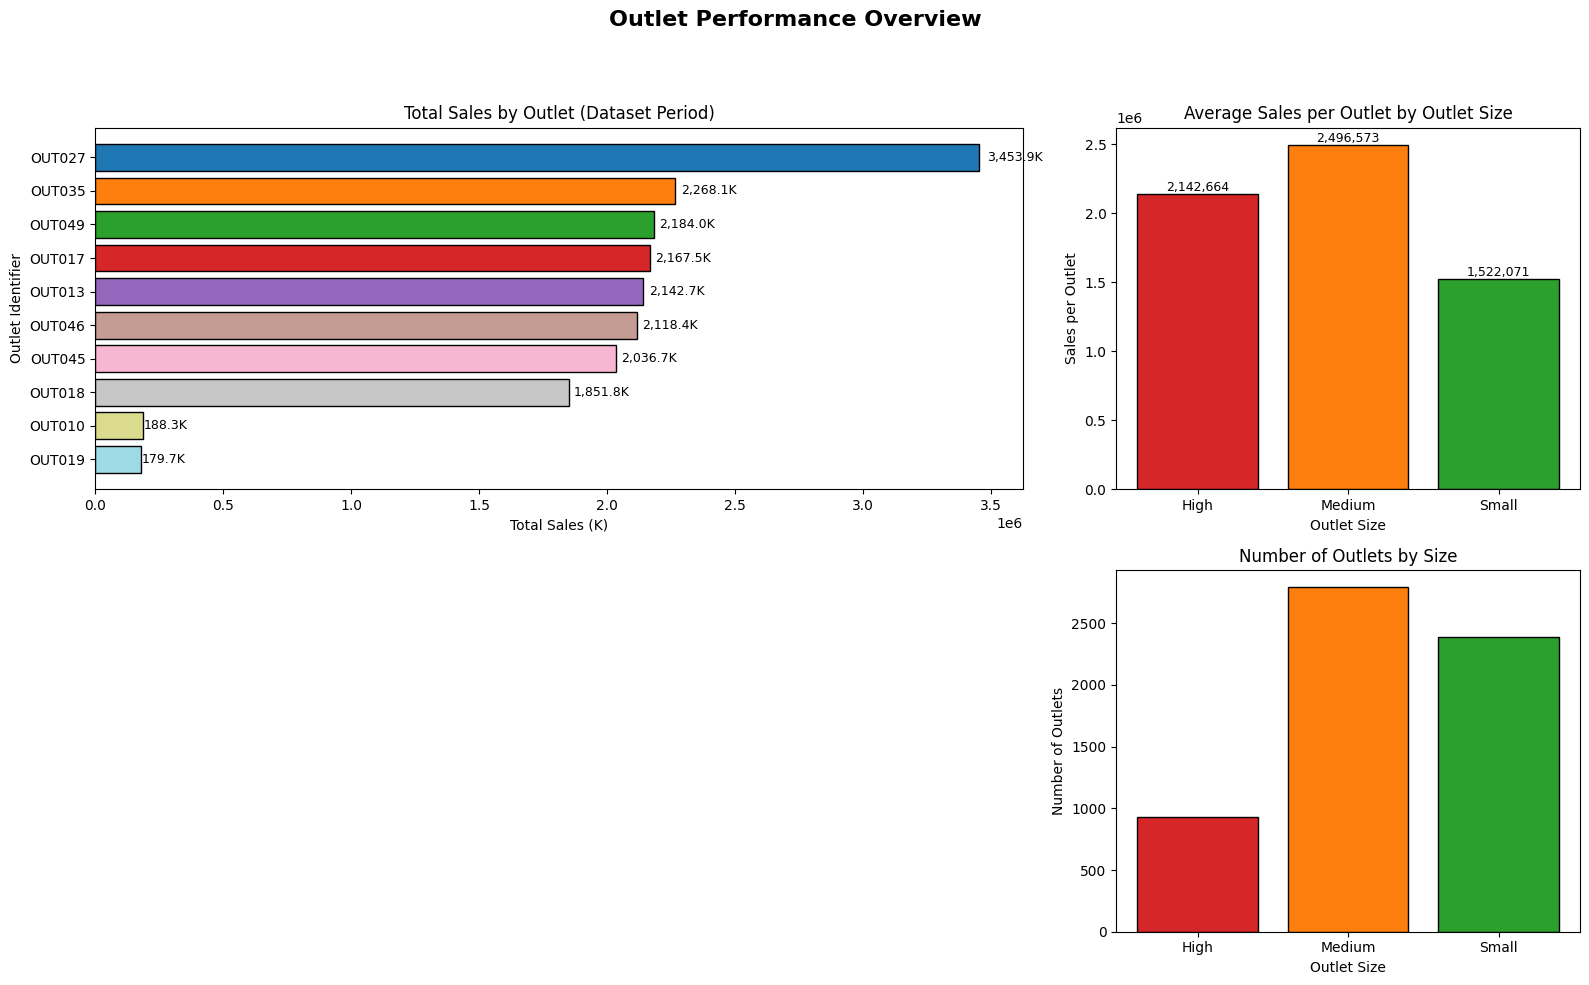

In [ ]:
# ================================
# Prepare data
# ================================
outlet_sales = (
    df.groupby("Outlet_Identifier")["Item_Outlet_Sales"]
      .sum()
      .sort_values(ascending=False)
)

outlet_size_counts = df["Outlet_Size"].value_counts().sort_index()

colors_outlet = plt.cm.tab20(np.linspace(0, 1, len(outlet_sales)))
colors_size   = ["#d62728", "#ff7f0e", "#2ca02c"]

# ================================
# Create subplots
# ================================
fig, axes = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(16, 10),
    gridspec_kw={"width_ratios": [2, 1]}
)

# ================================
# (1) Total Sales by Outlet
# ================================
bars = axes[0, 0].barh(
    outlet_sales.index,
    outlet_sales.values,
    color=colors_outlet,
    edgecolor="black"
)

axes[0, 0].set_title("Total Sales by Outlet (Dataset Period)")
axes[0, 0].set_xlabel("Total Sales (K)")
axes[0, 0].set_ylabel("Outlet Identifier")
axes[0, 0].invert_yaxis()

for bar in bars:
    value = bar.get_width()
    axes[0, 0].text(
        value * 1.01,
        bar.get_y() + bar.get_height() / 2,
        f"{value/1_000:,.1f}K",
        va="center",
        fontsize=9
    )

# ================================
# (2) Avg Sales per Outlet Size
# ================================
bars = axes[0, 1].bar(
    sales_per_outlet_size.index,
    sales_per_outlet_size["Sales_per_Outlet"],
    color=colors_size,
    edgecolor="black"
)

axes[0, 1].set_title("Average Sales per Outlet by Outlet Size")
axes[0, 1].set_xlabel("Outlet Size")
axes[0, 1].set_ylabel("Sales per Outlet")

for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:,.0f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

# ================================
# (3) Number of Outlets by Size
# ================================
axes[1, 1].bar(
    outlet_size_counts.index,
    outlet_size_counts.values,
    color=colors_size,
    edgecolor="black"
)

axes[1, 1].set_title("Number of Outlets by Size")
axes[1, 1].set_xlabel("Outlet Size")
axes[1, 1].set_ylabel("Number of Outlets")

axes[1, 0].axis("off")

# ================================
# Layout
# ================================
plt.suptitle(
    "Outlet Performance Overview",
    fontsize=16,
    fontweight="bold"
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

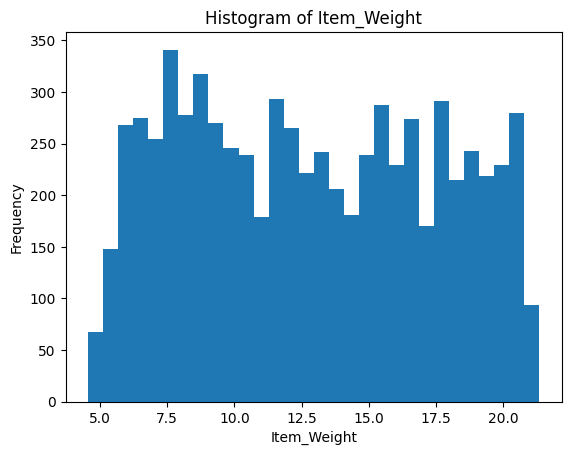

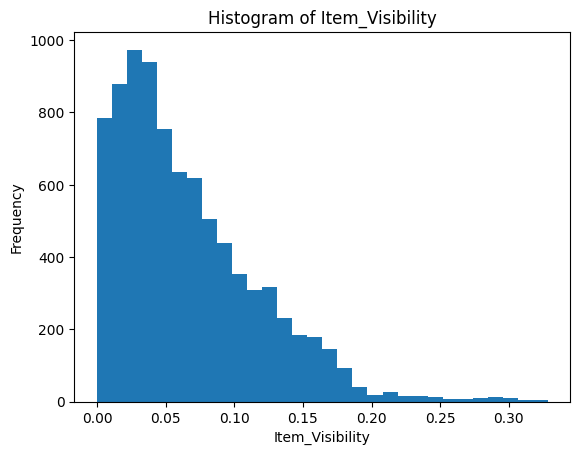

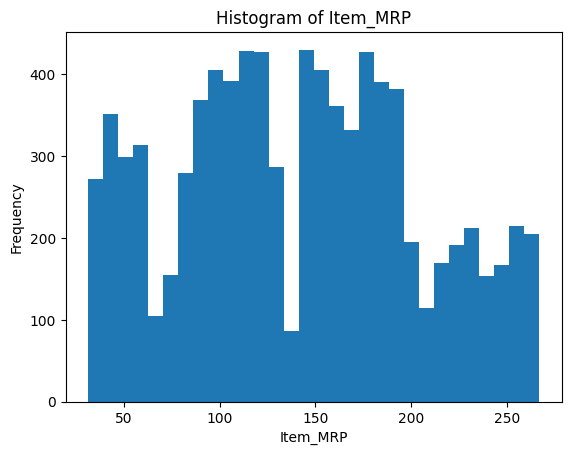

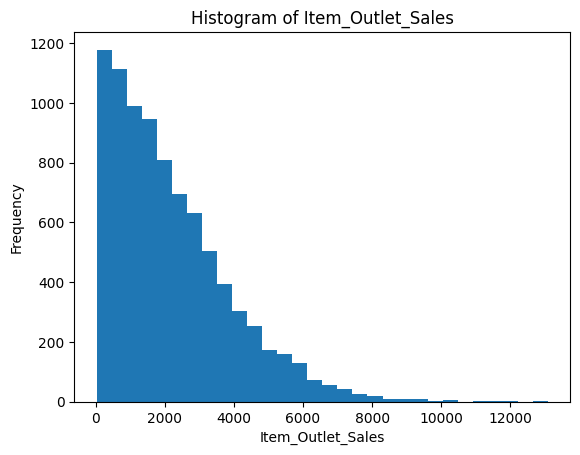

In [ ]:
# =====================================================
# Data Distribution
# =====================================================

# Select numeric columns only for histograms
numeric_cols = df.select_dtypes(include="number").columns

# Plot histogram for each numeric column (one plot per chart, no subplots)
for col in numeric_cols:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
df["Item_Weight"].mean()

np.float64(12.857645184135976)

In [ ]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(), inplace = True)

/tmp/ipython-input-2256677167.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Item_Weight"].fillna(df["Item_Weight"].mean(), inplace = True)


In [ ]:
df["Outlet_Size"].mode()

,Outlet_Size
0,Medium


In [ ]:
df["Outlet_Size"] = (
    df.groupby("Outlet_Type")["Outlet_Size"]
      .transform(lambda x: x.fillna(x.mode()[0]))
)


In [ ]:
df["Outlet_Size"]

,Outlet_Size
0,Medium
1,Medium
2,Medium
3,Small
4,High
...,...
8518,High
8519,Small
8520,Small
8521,Medium


In [ ]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523,8523.000000
mean,12.857645,0.066132,140.992782,1997-10-31 13:12:33.959873408,2181.288914
min,4.555000,0.000000,31.290000,1985-01-01 00:00:00,33.290000
25%,9.310000,0.026989,93.826500,1987-01-01 00:00:00,834.247400
50%,12.857645,0.053931,143.012800,1999-01-01 00:00:00,1794.331000
75%,16.000000,0.094585,185.643700,2004-01-01 00:00:00,3101.296400
max,21.350000,0.328391,266.888400,2009-01-01 00:00:00,13086.964800
std,4.226124,0.051598,62.275067,NaN,1706.499616


/tmp/ipython-input-2245215990.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


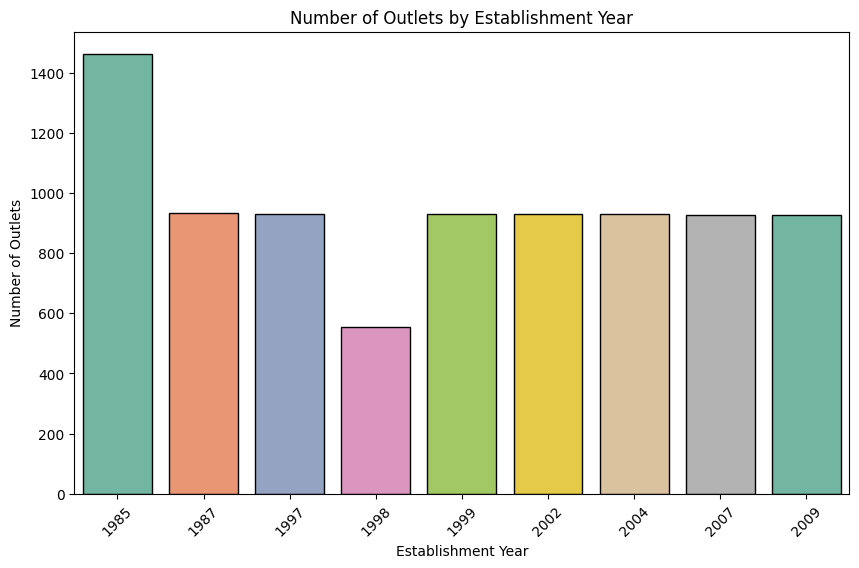

In [ ]:
df["Establishment_Year"] = df["Outlet_Establishment_Year"].dt.year

plt.figure(figsize=(10, 6))

sns.countplot(
    data=df,
    x="Establishment_Year",
    palette="Set2",
    edgecolor = "black"
)

plt.title("Number of Outlets by Establishment Year")
plt.xlabel("Establishment Year")
plt.ylabel("Number of Outlets")
plt.xticks(rotation=45)

plt.show()

/tmp/ipython-input-1636373225.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


<Axes: xlabel='Item_Fat_Content', ylabel='count'>

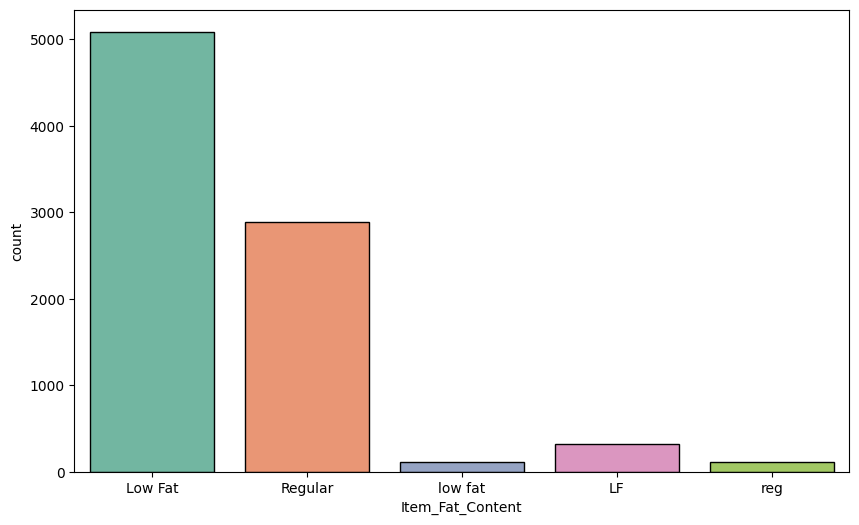

In [ ]:
plt.figure(figsize=(10, 6))

sns.countplot(
    x = "Item_Fat_Content",
    data = df,
    palette = "Set2",
    edgecolor = "black"
)

/tmp/ipython-input-1680537478.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


<Axes: xlabel='Item_Type', ylabel='count'>

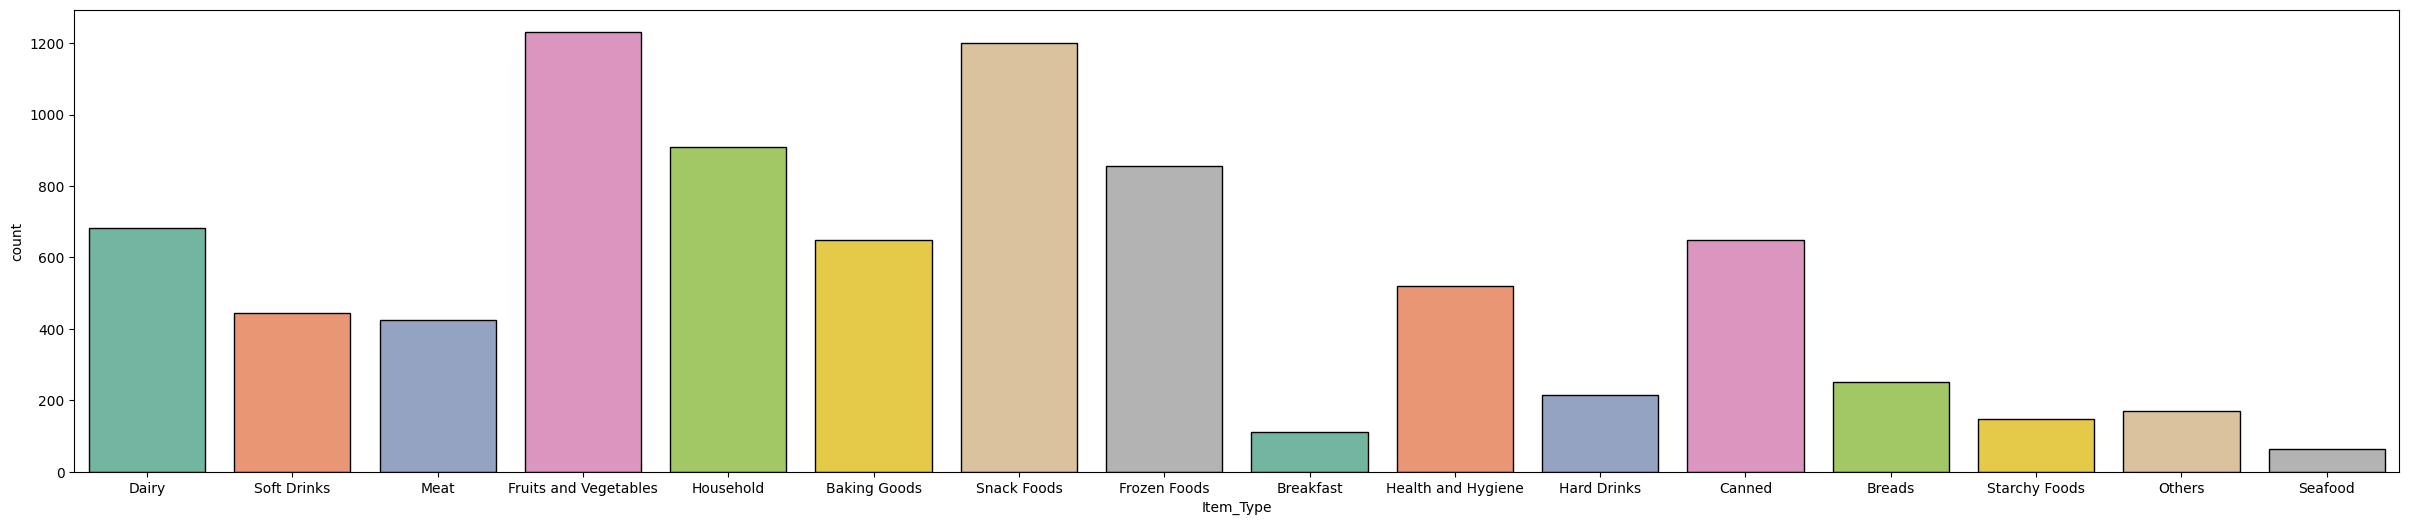

In [ ]:
plt.figure(figsize=(30, 6))

sns.countplot(
    x = "Item_Type",
    data = df,
    palette = "Set2",
    edgecolor = "black"
)

In [ ]:
df.columns.values

array(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content',
       'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Establishment_Year'],
      dtype=object)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = df[
    [
        "Item_Weight",
        "Item_Visibility",
        "Item_MRP"
    ]
].copy()


vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

In [ ]:
vif

,VIF,Features
0,4.753126,Item_Weight
1,2.368765,Item_Visibility
2,4.378331,Item_MRP


In [ ]:
df_model = df.copy()

df_model["Item_Fat_Content"] = df_model["Item_Fat_Content"].replace({
    "low fat": "Low Fat",
    "LF": "Low Fat",
    "reg": "Regular"
})

cat_cols = [
    "Item_Fat_Content",
    "Item_Type",
    "Outlet_Size",
    "Outlet_Location_Type",
    "Outlet_Type"
]

df_model = pd.get_dummies(
    df_model,
    columns=cat_cols,
    drop_first=True
)

In [ ]:
assert "Item_Fat_Content" not in df_model.columns

In [ ]:
bool_cols = df_model.select_dtypes(include="bool").columns
df_model[bool_cols] = df_model[bool_cols].astype(int)

In [ ]:
df_model = df_model.drop("Outlet_Establishment_Year", axis=1)

In [ ]:
df_model

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.300,0.016047,249.8092,OUT049,3735.1380,1999,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,DRC01,5.920,0.019278,48.2692,OUT018,443.4228,2009,1,0,0,...,0,1,0,1,0,0,1,0,1,0
2,FDN15,17.500,0.016760,141.6180,OUT049,2097.2700,1999,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,FDX07,19.200,0.000000,182.0950,OUT010,732.3800,1998,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,NCD19,8.930,0.000000,53.8614,OUT013,994.7052,1987,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,OUT013,2778.3834,1987,0,0,0,...,1,0,0,0,0,0,1,1,0,0
8519,FDS36,8.380,0.046982,108.1570,OUT045,549.2850,2002,1,0,0,...,0,0,0,0,1,1,0,1,0,0
8520,NCJ29,10.600,0.035186,85.1224,OUT035,1193.1136,2004,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8521,FDN46,7.210,0.145221,103.1332,OUT018,1845.5976,2009,1,0,0,...,1,0,0,1,0,0,1,0,1,0


In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   object 
 1   Item_Weight                      8523 non-null   float64
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Identifier                8523 non-null   object 
 5   Item_Outlet_Sales                8523 non-null   float64
 6   Establishment_Year               8523 non-null   int32  
 7   Item_Fat_Content_Regular         8523 non-null   int64  
 8   Item_Type_Breads                 8523 non-null   int64  
 9   Item_Type_Breakfast              8523 non-null   int64  
 10  Item_Type_Canned                 8523 non-null   int64  
 11  Item_Type_Dairy                  8523 non-null   int64  
 12  Item_Type_Frozen Foo

In [ ]:
df_model = df_model.drop(
    columns=["Item_Identifier", "Outlet_Identifier", "Establishment_Year"]
)

In [ ]:
x = df_model.drop("Item_Outlet_Sales", axis=1)
y = df_model["Item_Outlet_Sales"]

In [ ]:
x

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,1,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
4,8.930,0.000000,53.8614,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8520,10.600,0.035186,85.1224,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,1,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0


In [ ]:
y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_hat = lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_hat))
r2   = r2_score(y_test, y_hat)

rmse, r2

(np.float64(1071.8865173536599), 0.5772798530063514)

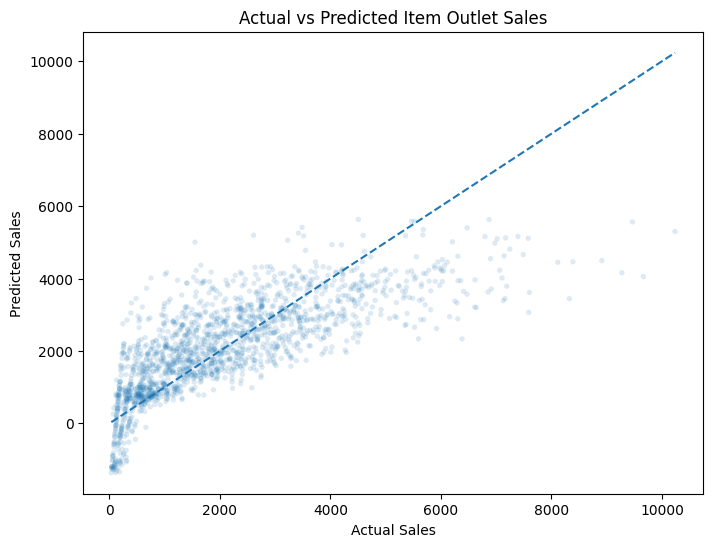

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(
    y_test,
    y_hat,
    alpha=0.15,
    s=15,
    edgecolors="none"
)

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Item Outlet Sales")
plt.show()

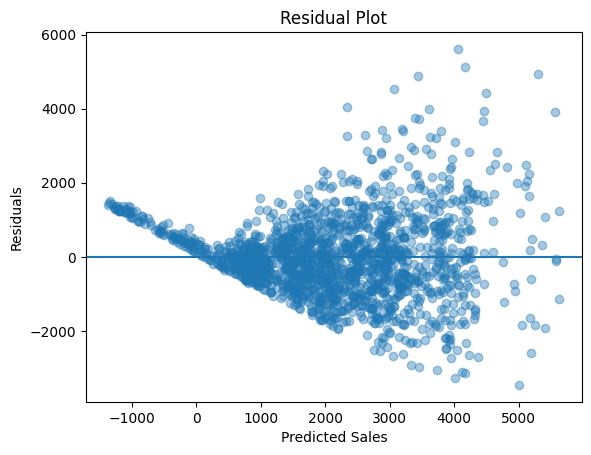

In [ ]:
residuals = y_test - y_hat

plt.scatter(y_hat, residuals, alpha=0.4)
plt.axhline(0)
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
coef = pd.DataFrame({
    "Feature": x_train.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

coef.head(10)

,Feature,Coefficient
25,Outlet_Type_Supermarket Type3,3238.479573
23,Outlet_Type_Supermarket Type1,1860.554952
24,Outlet_Type_Supermarket Type2,1515.739596
15,Item_Type_Seafood,223.440640
21,Outlet_Location_Type_Tier 2,80.426766
5,Item_Type_Breakfast,69.710060
3,Item_Fat_Content_Regular,45.918553
9,Item_Type_Fruits and Vegetables,41.412030
6,Item_Type_Canned,24.801031
18,Item_Type_Starchy Foods,23.228587


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
regressor = XGBRegressor()

In [ ]:
regressor = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    min_child_weight=5,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42
)

regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_hat_train = regressor.predict(x_train)
y_hat_test  = regressor.predict(x_test)

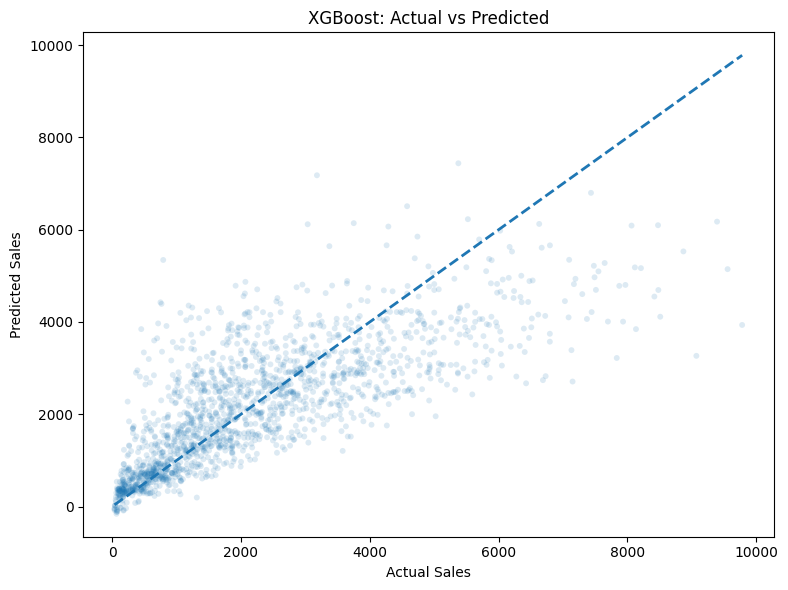

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(
    y_test, y_hat_test,
    alpha=0.15,
    s=18,
    edgecolors='none'
)

# เส้น y = x
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--",
    linewidth=2
)

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("XGBoost: Actual vs Predicted")
plt.tight_layout()
plt.show()

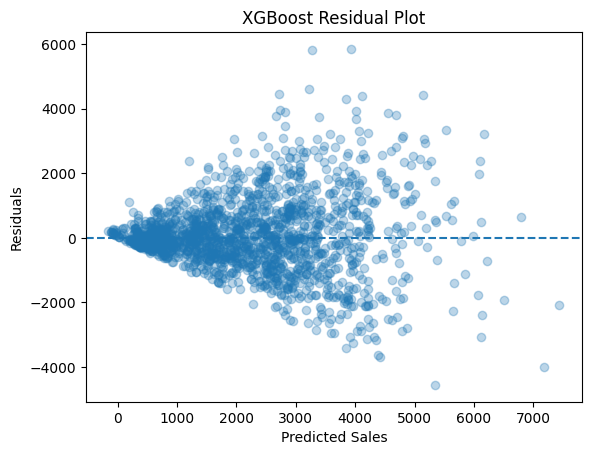

In [ ]:
residuals = y_test - y_hat_test

plt.scatter(y_hat_test, residuals, alpha=0.3)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("XGBoost Residual Plot")
plt.show()

In [ ]:
feat_imp = pd.Series(
    regressor.feature_importances_,
    index=x_train.columns
).sort_values(ascending=False)

feat_imp.head(10)

,0
Outlet_Type_Supermarket Type1,0.237795
Outlet_Type_Supermarket Type3,0.193779
Outlet_Size_Medium,0.118737
Item_MRP,0.106835
Outlet_Size_Small,0.061894
Outlet_Location_Type_Tier 2,0.039752
Outlet_Type_Supermarket Type2,0.036542
Outlet_Location_Type_Tier 3,0.019599
Item_Type_Fruits and Vegetables,0.012623
Item_Visibility,0.012185


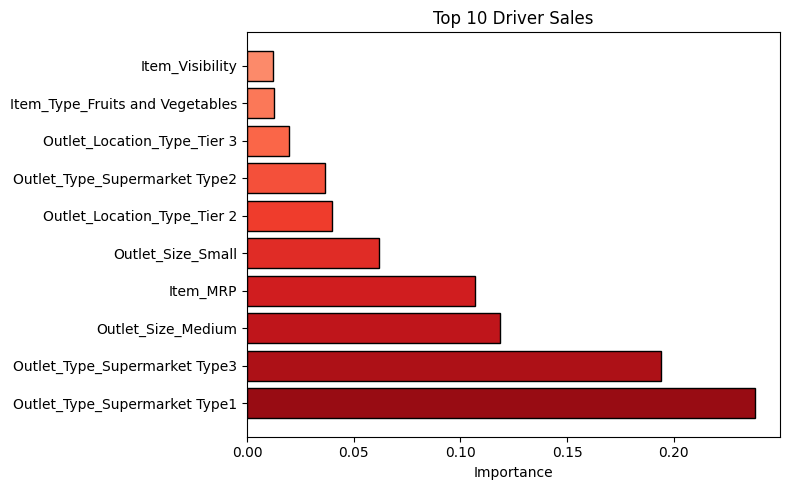

In [ ]:
top10 = feat_imp.head(10).sort_values()

colors = plt.cm.Reds(
    np.linspace(0.4, 0.9, len(top10))
)

plt.figure(figsize=(8, 5))
plt.barh(
    top10.index,
    top10.values,
    color=colors,
    edgecolor="black"
)

plt.title("Top 10 Driver Sales", fontsize=12)
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Sales Forecast

**“If we launch a new snack product priced at 150,
sold in Supermarket Type 1 outlets,
located in Tier 2 areas with medium-sized stores,
with a product weight of 9.3 grams,
approximately 4.5% shelf visibility,
and positioned as a regular snack (not low-fat),

what level of sales per outlet should we reasonably expect?”**

In [ ]:
input = {
    "Item_Weight": 9.3,
    "Item_Visibility": 0.045,
    "Item_MRP": 150,

    "Item_Fat_Content_Regular": 1,

    "Item_Type_Snack Foods": 1,

    "Outlet_Size_Medium": 1,
    "Outlet_Location_Type_Tier 2": 1,
    "Outlet_Type_Supermarket Type1": 1
}

input = pd.DataFrame([input])

input = input.reindex(columns=x_train.columns, fill_value=0)

input

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.3,0.045,150,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [ ]:
pred_lr = lr.predict(input)

print(f"Predicted Sales (Linear Regression): {pred_lr[0]:,.2f}")

Predicted Sales (Linear Regression): 2,622.85


In [ ]:
pred_xgb = regressor.predict(input)

print(f"Predicted Sales (XGBoost): {pred_xgb[0]:,.2f}")

Predicted Sales (XGBoost): 2,526.07


===== DATA OVERVIEW =====

Total Records : 8,523
Total Features: 13

Item_Weight:
  mean = 12.86
  std  = 4.23
  min  = 4.55
  max  = 21.35

Item_Visibility:
  mean = 0.07
  std  = 0.05
  min  = 0.00
  max  = 0.33

Item_MRP:
  mean = 140.99
  std  = 62.28
  min  = 31.29
  max  = 266.89

Item_Outlet_Sales:
  mean = 2181.29
  std  = 1706.50
  min  = 33.29
  max  = 13086.96

Establishment_Year:
  mean = 1997.83
  std  = 8.37
  min  = 1985.00
  max  = 2009.00

===== TARGET VARIABLE =====

Item_Outlet_Sales:
  Mean Sales : 2,181.29
  Median    : 1,794.33
  Std       : 1,706.50
  Min–Max   : 33.29 – 13,086.96

===== MODEL PERFORMANCE =====

[Linear Regression (Test)]
  R2   : -0.531
  MAE  : 1,720.06
  RMSE : 2,173.82

[XGBoost (Train)]
  R2   : 0.676
  MAE  : 689.26
  RMSE : 963.54

[XGBoost (Test)]
  R2   : 0.581
  MAE  : 797.67
  RMSE : 1,137.90



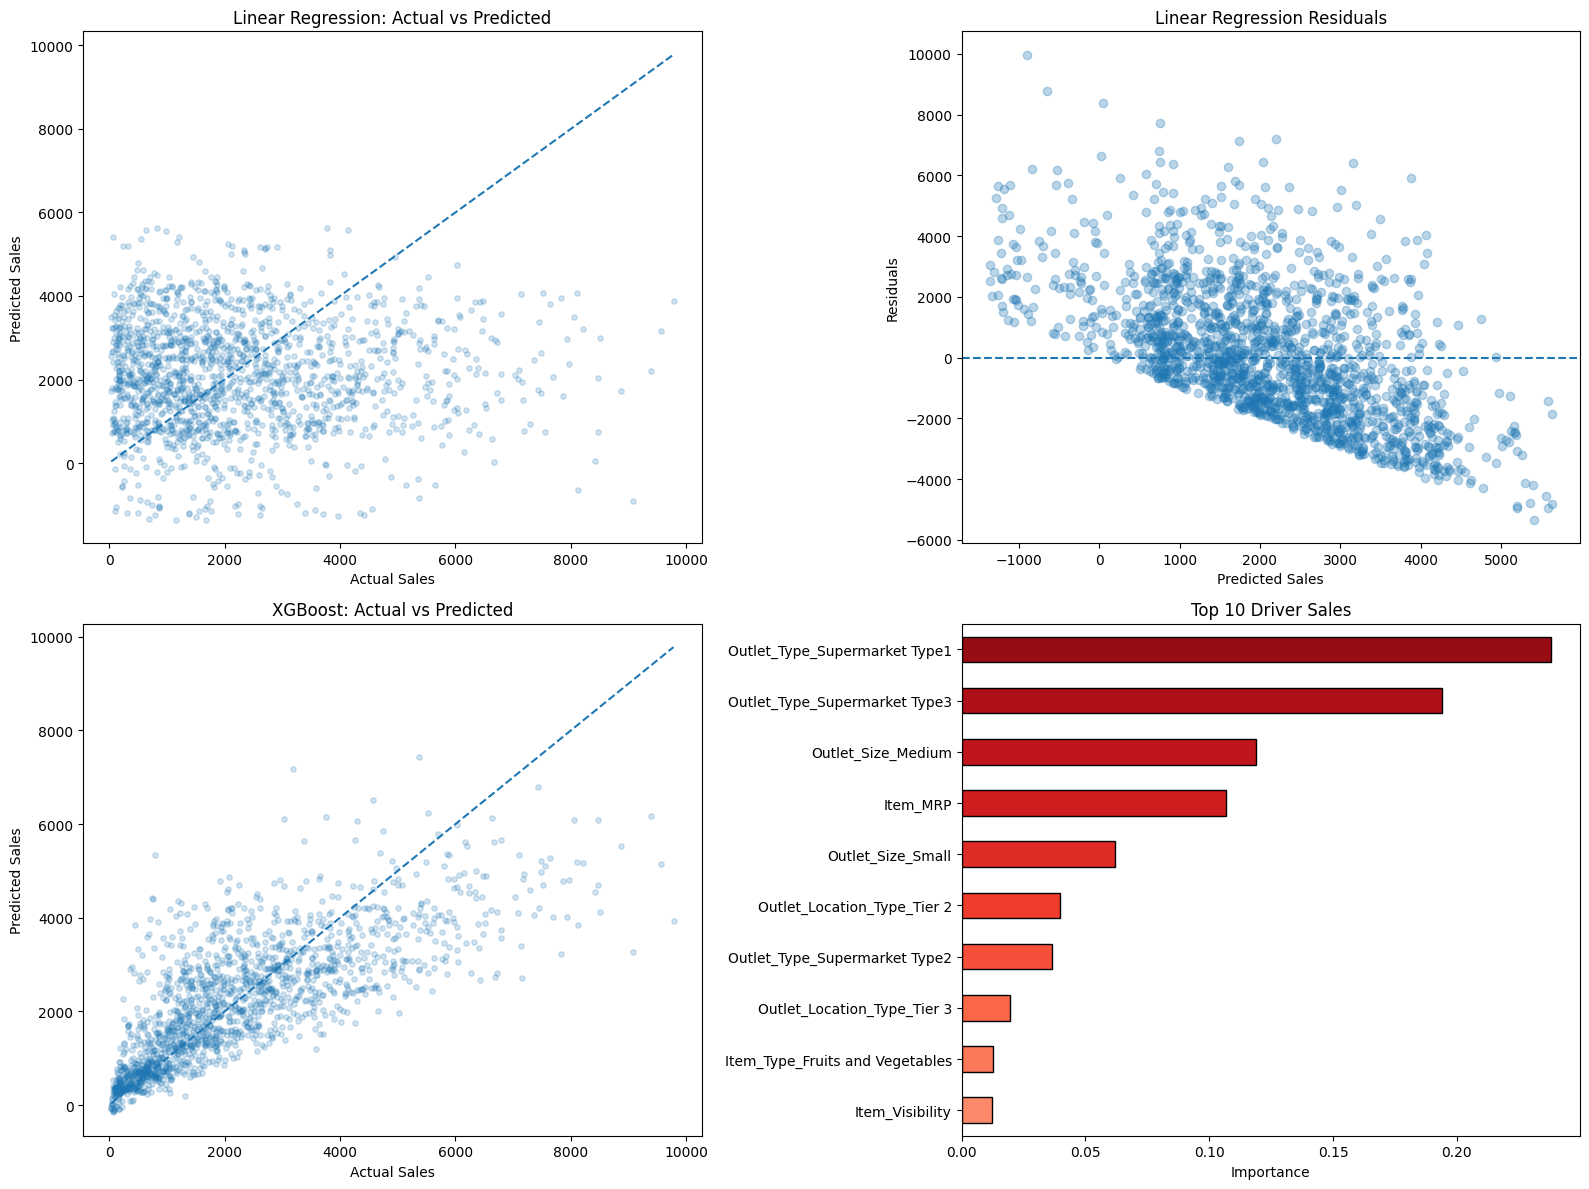

===== KEY INSIGHTS =====

- Strongest driver of sales: Outlet_Type_Supermarket Type1
- XGBoost outperforms Linear Regression (higher R2, lower RMSE)
- Residual variance increases with sales → heteroscedasticity present
- Model shows acceptable generalization with minor performance gap between train and test sets
✅ REPORT COMPLETED


In [ ]:
# ==========================================
# 🛒 BIGMART SALES PREDICTION REPORT
# ==========================================

print("===== DATA OVERVIEW =====\n")

# -------------------------------
# 1) Dataset Overview
# -------------------------------
print(f"Total Records : {df.shape[0]:,}")
print(f"Total Features: {df.shape[1]:,}\n")

for col in df.select_dtypes(include="number").columns:
    print(f"{col}:")
    print(f"  mean = {df[col].mean():.2f}")
    print(f"  std  = {df[col].std():.2f}")
    print(f"  min  = {df[col].min():.2f}")
    print(f"  max  = {df[col].max():.2f}")
    print()

# -------------------------------
# 2) Target Variable Summary
# -------------------------------
print("===== TARGET VARIABLE =====\n")

print("Item_Outlet_Sales:")
print(f"  Mean Sales : {y.mean():,.2f}")
print(f"  Median    : {y.median():,.2f}")
print(f"  Std       : {y.std():,.2f}")
print(f"  Min–Max   : {y.min():,.2f} – {y.max():,.2f}\n")

# -------------------------------
# 3) Model Performance
# -------------------------------
print("===== MODEL PERFORMANCE =====\n")

def report_metrics(name, y_true, y_pred):
    print(f"[{name}]")
    print(f"  R2   : {r2_score(y_true, y_pred):.3f}")
    print(f"  MAE  : {mean_absolute_error(y_true, y_pred):,.2f}")
    print(f"  RMSE : {np.sqrt(mean_squared_error(y_true, y_pred)):,.2f}\n")

report_metrics("Linear Regression (Test)", y_test, y_hat)
report_metrics("XGBoost (Train)", y_train, y_hat_train)
report_metrics("XGBoost (Test)", y_test, y_hat_test)

# -------------------------------
# 4) Visualization
# -------------------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# (1) Actual vs Predicted – Linear Regression
axes[0, 0].scatter(y_test, y_hat, alpha=0.2, s=15)
axes[0, 0].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)
axes[0, 0].set_title("Linear Regression: Actual vs Predicted")
axes[0, 0].set_xlabel("Actual Sales")
axes[0, 0].set_ylabel("Predicted Sales")

# (2) Residual Plot – Linear Regression
res_lr = y_test - y_hat
axes[0, 1].scatter(y_hat, res_lr, alpha=0.3)
axes[0, 1].axhline(0, linestyle="--")
axes[0, 1].set_title("Linear Regression Residuals")
axes[0, 1].set_xlabel("Predicted Sales")
axes[0, 1].set_ylabel("Residuals")

# (3) Actual vs Predicted – XGBoost
axes[1, 0].scatter(y_test, y_hat_test, alpha=0.2, s=15)
axes[1, 0].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)
axes[1, 0].set_title("XGBoost: Actual vs Predicted")
axes[1, 0].set_xlabel("Actual Sales")
axes[1, 0].set_ylabel("Predicted Sales")

# (4) Feature Importance – XGBoost
feat_imp.head(10).sort_values().plot(
    kind="barh",
    ax=axes[1, 1],
    color=colors,
    edgecolor="black"
)
axes[1, 1].set_title("Top 10 Driver Sales")
axes[1, 1].set_xlabel("Importance")

plt.tight_layout()
plt.show()

# -------------------------------
# 5) Key Insights (Auto-summary)
# -------------------------------
print("===== KEY INSIGHTS =====\n")

top_feat = feat_imp.index[0]
print(f"- Strongest driver of sales: {top_feat}")
print("- XGBoost outperforms Linear Regression (higher R2, lower RMSE)")
print("- Residual variance increases with sales → heteroscedasticity present")
print("- Model shows acceptable generalization with minor performance gap between train and test sets")

print("=====================================")
print("✅ REPORT COMPLETED")
print("=====================================")
